In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.placement_exam_marks.skew()

0.8356419499466834

In [5]:
df.placement_exam_marks.describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

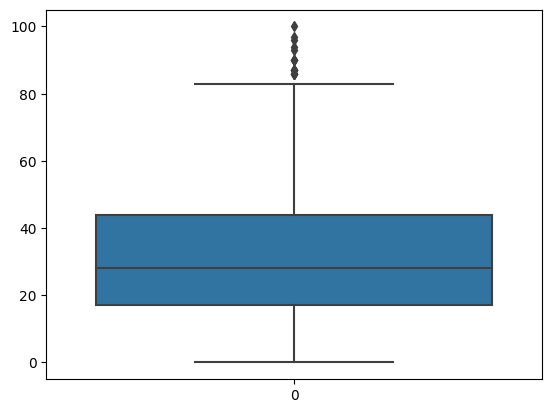

In [7]:
sns.boxplot(df.placement_exam_marks)

In [8]:
# Calculating IQR

percentile25=df.placement_exam_marks.quantile(0.25)
percentile75=df.placement_exam_marks.quantile(0.75)

In [9]:
iqr=percentile75 - percentile25

In [11]:
iqr

27.0

In [15]:
upper= percentile75 + 1.5 * iqr
lower = percentile25 - 1.5 * iqr

Finding Outliers

In [23]:
trim = df[df['placement_exam_marks']< upper]

In [24]:
df[df['placement_exam_marks'] < lower]

,cgpa,placement_exam_marks,placed


In [25]:
trim

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: >

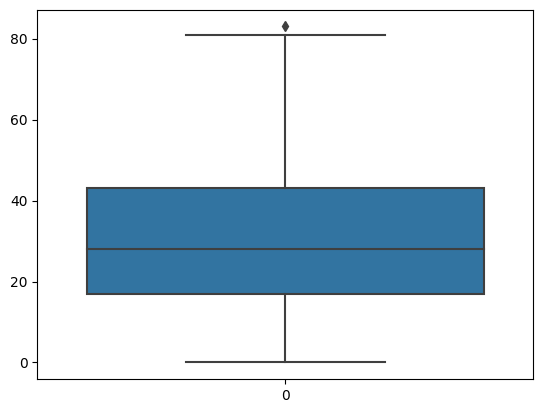

In [27]:
sns.boxplot(trim['placement_exam_marks'])

Capping

In [28]:
capped_df=np.where(
    df['placement_exam_marks']>upper,
    upper,
    np.where(
        df['placement_exam_marks']<lower,
        lower,
        df['placement_exam_marks']
    )
)

In [30]:
capped_df.shape

(1000,)

<Axes: >

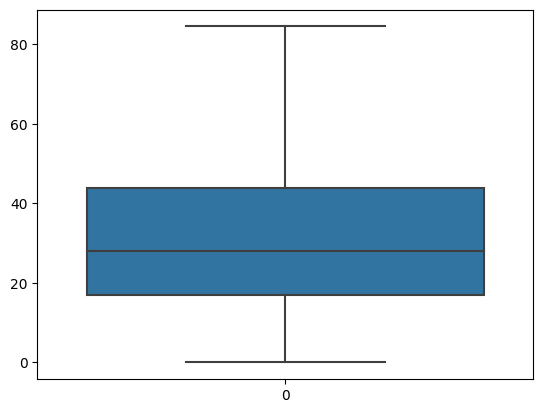

In [31]:
sns.boxplot(capped_df)